In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios

In [2]:
# Primero: Discretizo la chapa donde quiero resolver la ecuación. Me queda grilla de Nx*Ny

# La recorro con índice "k" que va desde 1 a Nx*Ny (sería 0 a Nx*Ny-1)

# tengo una ecuacion diferencial por cada k, es decir, tengo Nx*Ny.
# La llevo a esa forma de la diapo 5.

# una ecuacion por fila k, una incognita en la columna k (sería en la diagonal)

In [3]:
# me armo vector columna T de Nx*Ny valores


In [4]:
# La mtriz tendrá Nx*Ny*Nx*Ny

# # Debido a que "y[0]", "y[n-1]", "A[0,0]" y "A[n-1,n-1]" tienen su valor correcto, deberá recorrerse desde "i=1" hasta "i=n-2"
# para asignar los valores correctos al resto de componentes de "A" e "y".
# for i in range(1,n-1):
#    A[i,i-1]=h[i-1]
#    A[i,i]=2*(h[i]+h[i-1])
#    A[i,i+1]=h[i]
#    y[i]=3*(((T[i+1]-T[i])/h[i])-((T[i]-T[i-1])/h[i-1]))

In [5]:
# Debo resolver sistema de ecuaciones "MT=b", siendo "M" de tamaño "(nx*ny)*(nx*ny)", 

In [6]:
# CONDICIÓN: En el borde sólo aparece coeficiente NO NULO en la columna "k", el resto de coeficientes vale 0. y Hago b_k =T_A

In [7]:
# PRUEBA: Discretizo chapa como una grilla de tamaño "nx*ny".
nx = 3
ny = 3

In [8]:
# Defino "beta = nx/ny"
beta = nx / ny

In [9]:
# Teniendo en cuenta que la matriz tendrá "1" en la diagonal y el resto "0" cuando corresponde a un "k" de borde, defino la
# matriz "M" como sigue:
M = np.identity(nx*ny)
print(M)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
# Para el vector "b", deberá ir el valor de Tborde cuando en la matriz "M" la diagonal valga "1".
# b[0]=(Ta+Tb)/2, porque a ese punto le intersectan las caras que están a temperatura Ta y Tb
# b[1]=Tb
# b[2]=(Tc+Tb)/2, porque a ese punto le intersectan las caras que están a temperatura Tc y Tb
# b[3]=Ta
# b[4]=0 porque sigue la ecuación
# b[5]=Tc
# b[6]=(Ta+Td)/2, porque a ese punto le intersectan las caras que están a temperatura Ta y Td
# b[7]=Td
# b[8]=(Tc+Td)/2, porque a ese punto le intersectan las caras que están a temperatura Tc y Td

In [11]:
T_a,T_b,T_c,T_d = (75,0,50,100)

In [12]:
# Defino vector "b" como vector nulo, porque en un problema general la mayoría de las ecuaciones están igualadas a "0", salvo 
# cuando se impone alguna condición de borde.
b = np.zeros((nx*ny,1))

In [13]:
# Defino la cantidad total de valores de "k" que deberán recorrerse, es decir, el número de filas "nx*ny".
nk = nx*ny

# Recorro la matriz desde abajo a la izquierda, hacia arriba a la derecha, moviéndome hacia la derecha.
for k in range(nk):
    # Primero pregunto si me encuentro en alguno de los 4 vértices
    if k==0:
        # Me encuentro en el vértice "k=0". El elemento en la diagonal de "M" se mantiene como "1" Asigno el valor de "b" como
        # el promedio entre la T de cada uno de los lados que intersectan el vértice.
        b[k] = (T_a + T_b)/2
    elif k==nx-1:
        # Me encuentro en el vértice "k=nx-1". El elemento en la diagonal de "M" se mantiene como "1" Asigno el valor de "b" como
        # el promedio entre la T de cada uno de los lados que intersectan el vértice.
        b[k] = (T_b + T_c)/2
    elif k==nk-nx:
        # Me encuentro en el vértice "k=nx-1". El elemento en la diagonal de "M" se mantiene como "1" Asigno el valor de "b" como
        # el promedio entre la T de cada uno de los lados que intersectan el vértice.
        b[k] = (T_a + T_d)/2
    elif k==nk-1:
        # Me encuentro en el vértice "k=nx-1". El elemento en la diagonal de "M" se mantiene como "1" Asigno el valor de "b" como
        # el promedio entre la T de cada uno de los lados que intersectan el vértice.
        b[k] = (T_c + T_d)/2
    elif k<nx-1:
        # Estoy recorriendo el vértice inferior. El elemento en la diagonal de "M" se mantiene como "1". Asigno el valor de "b" como
        # la T de ese lado.
        b[k] = T_b
    elif k>nk-nx-1:
        # Estoy recorriendo el vértice inferior. El elemento en la diagonal de "M" se mantiene como "1". Asigno el valor de "b" como
        # la T de ese lado.
        b[k] = T_d
    elif k%nx==0:
        b[k] = T_a
    elif (k+1)%nx==0:
        b[k] = T_c
    else:
        M[k,k]=-2*(1+beta**2)
        M[k,k-1]=1
        M[k,k+1]=1
        M[k,k-nx]=beta**2
        M[k,k+nx]=beta**2


In [14]:
M

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

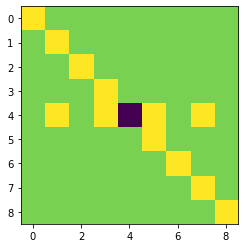

In [15]:
plt.imshow(M)

# Solución

In [16]:
Temp = np.linalg.solve(M,b)
print(Temp)

[[ 37.5 ]
 [  0.  ]
 [ 25.  ]
 [ 75.  ]
 [ 56.25]
 [ 50.  ]
 [ 87.5 ]
 [100.  ]
 [ 75.  ]]


In [17]:
Temp_plot = Temp.flatten().reshape(nx,ny)
Temp_plot


array([[ 37.5 ,   0.  ,  25.  ],
       [ 75.  ,  56.25,  50.  ],
       [ 87.5 , 100.  ,  75.  ]])

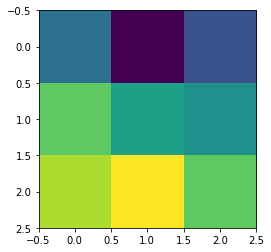

In [18]:
plt.imshow(Temp_plot)